In [1]:
import pandas as pd

# Loading DataSet

In [2]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#checking for null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#reading test data
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
#cheking null values
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data PreProcessing

In [7]:
#Based on above exploration, missing columns
#Train Data - Cabin, Age, Embarked
#Test Data - Cabin, Age, Fare

In [8]:
#Based on this Age, Cabin and Embarked are having Null values
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
import random
null_indices = train_df[train_df['Embarked'].isnull()].index
freq_Embarked = train_df['Embarked'].value_counts()
print(freq_Embarked)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [10]:
for i in null_indices:
    train_df.loc[i, 'Embarked'] = 'S'

In [11]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [12]:
#Filling age value with median and dropping cabin, Passenger Id and Ticket columns
def preprocessing(df):
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df.drop(columns = ['Cabin','Ticket'],inplace=True)
    
    return df

train_df = preprocessing(train_df)
test_df = preprocessing(test_df)

In [13]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [14]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,8.0500,S


In [15]:
#converting categorical features to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

def transform_categorical(df):
    label_encoder = LabelEncoder()

    # Fit and transform the sex,pclass and embarked column
    df['Sex_Encoded'] = label_encoder.fit_transform(df['Sex'])
    df['Pclass_Encoded'] = label_encoder.fit_transform(df['Pclass'])
    df['Embarked_Encoded'] = label_encoder.fit_transform(df['Embarked'])
    df.drop(columns = ['Pclass','Sex','Embarked'],inplace=True)
    
    return df

train_df = transform_categorical(train_df)
test_df = transform_categorical(test_df)
    

In [16]:
train_df.drop(columns=['Name','PassengerId'],inplace=True)

In [17]:
#Creating new features based on (Sibsp and Parch)
def feature(df):
    df['Family_size'] = df['SibSp'].astype(int) + df['Parch'].astype(int) + 1
    df['IsAlone'] = 0
    df.loc[df['Family_size']==1, 'IsAlone'] = 1
    df.drop(columns=['SibSp','Parch'],inplace=True)
    
    return df

train_df = feature(train_df)
test_df = feature(test_df)

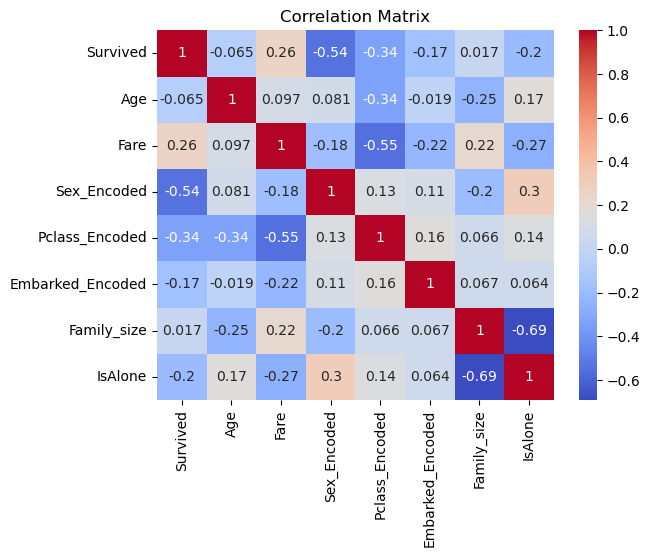

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [19]:
train_df.shape

(891, 8)

In [20]:
test_df.shape

(418, 9)

# Model Building and Training

In [21]:
X = train_df.drop(columns=['Survived'],axis=1)
y = train_df['Survived']

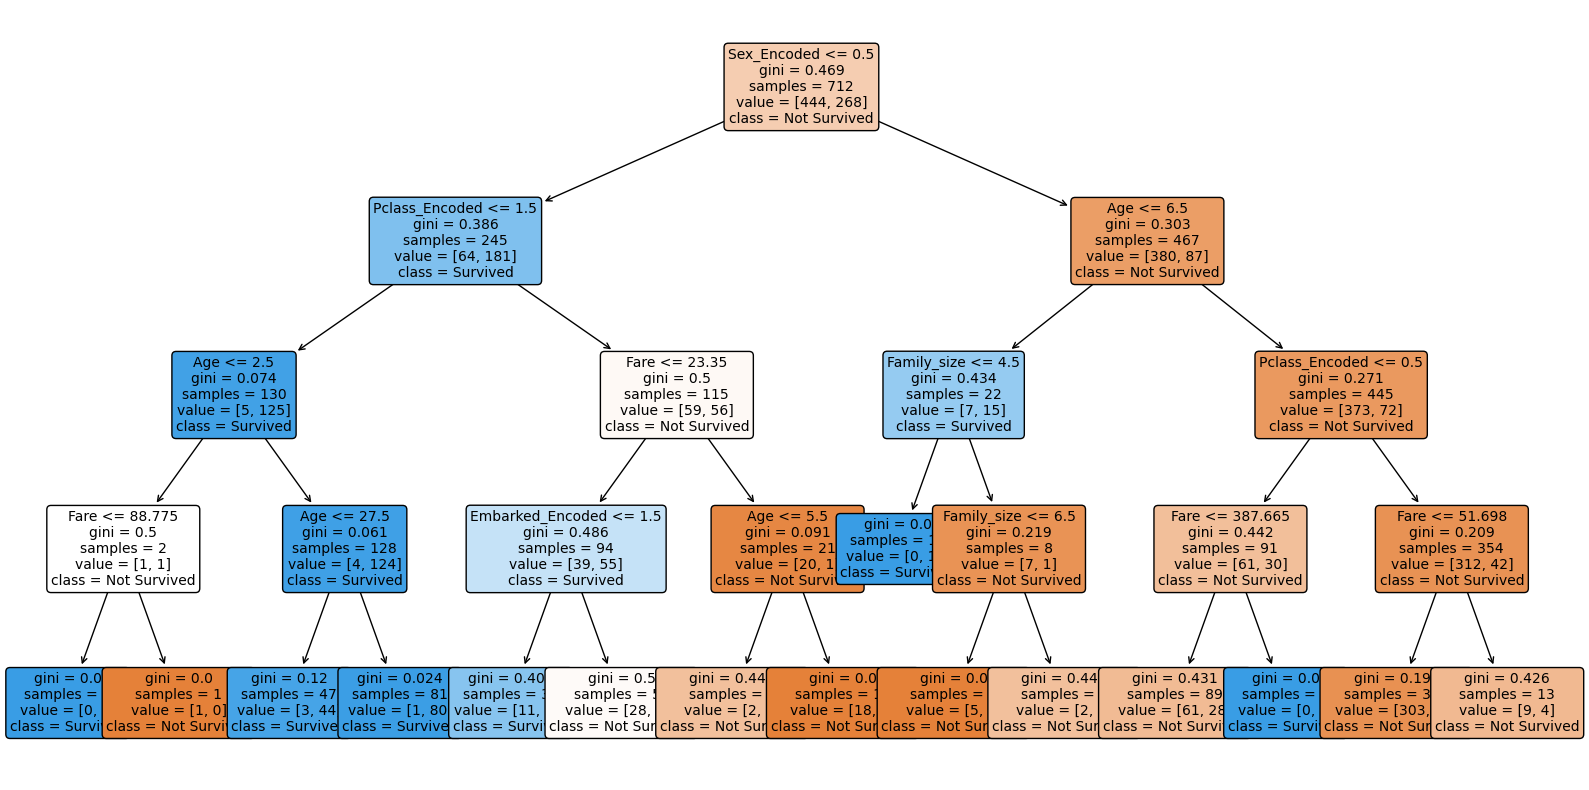

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns.tolist(), class_names=["Not Survived", "Survived"], filled=True, rounded=True, fontsize=10)
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score

# Compute cross-validation scores for the best decision tree model
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

average_accuracy = cv_scores.mean()

average_accuracy

0.8092461239093591

In [24]:
test_df

,PassengerId,Name,Age,Fare,Sex_Encoded,Pclass_Encoded,Embarked_Encoded,Family_size,IsAlone
0,892,"Kelly, Mr. James",34.5,7.8292,1,2,1,1,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,7.0000,0,2,2,2,0
2,894,"Myles, Mr. Thomas Francis",62.0,9.6875,1,1,1,1,1
3,895,"Wirz, Mr. Albert",27.0,8.6625,1,2,2,1,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,12.2875,0,2,2,3,0
...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",27.0,8.0500,1,2,2,1,1
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,108.9000,0,0,0,1,1
415,1307,"Saether, Mr. Simon Sivertsen",38.5,7.2500,1,2,2,1,1
416,1308,"Ware, Mr. Frederick",27.0,8.0500,1,2,2,1,1


In [25]:
test_df.drop(columns=['Name'],inplace=True)
X_test  = test_df.drop("PassengerId", axis=1).copy()
predictions = model.predict(X_test)

submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],  
    'Survived': predictions
})

submission_df.to_csv('submission_dt.csv', index=False)

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42,n_estimators=100,max_depth=5,min_samples_split=5,min_samples_leaf=2)

rf.fit(X_train, y_train)
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

rf_average_accuracy = rf_cv_scores.mean()

rf_average_accuracy

0.8148703785073128

In [27]:
predictions = rf.predict(X_test)
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'], 
    'Survived': predictions
})

submission_df.to_csv('submission_rf.csv', index=False)